The E Coli Imbalanced Dataset

The dataset describes the problem of classifying E.coli proteins using their amino acid sequences in their cell localization sites. That is, predicting how a protein will bind to a cell based on the chemical composition of the protein before it is folded.

The dataset is credited to Kenta Nakai and was developed into its current form by Paul Horton and Kenta Nakai in their 1996 paper titled “A Probabilistic Classification System For Predicting The Cellular Localization Sites Of Proteins.” In it, they achieved a classification accuracy of 81%.

The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

Ignoring the sequence name, the input features are described as follows:

mcg: McGeoch’s method for signal sequence recognition.

gvh: von Heijne’s method for signal sequence recognition.

lip: von Heijne’s Signal Peptidase II consensus sequence score.

chg: Presence of charge on N-terminus of predicted lipoproteins.

aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.

alm1: score of the ALOM membrane-spanning region prediction program.

alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

There are eight classes described as follows:

cp: cytoplasm

im: inner membrane without signal sequence

pp: periplasm

imU: inner membrane, non cleavable signal sequence

om: outer membrane

omL: outer membrane lipoprotein

imL: inner membrane lipoprotein

imS: inner membrane, cleavable signal sequence



Load libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load datasets

In [ ]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ecoli.csv")
train.columns = ['mcg','gvh', 'lip','chg','aac','alm1','alm2', 'result']

In [ ]:
train

,mcg,gvh,lip,chg,aac,alm1,alm2,result
0,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
...,...,...,...,...,...,...,...,...
330,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
331,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
332,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
333,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Check for null values

In [ ]:
train.isnull().sum()

mcg       0
gvh       0
lip       0
chg       0
aac       0
alm1      0
alm2      0
result    0
dtype: int64

Counter

In [ ]:
import collections
from collections import Counter

counter = Counter(train.result)
for k,v in counter.items():
	per = v / len(train.result) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=cp, Count=142, Percentage=42.388%
Class=im, Count=77, Percentage=22.985%
Class=imS, Count=2, Percentage=0.597%
Class=imL, Count=2, Percentage=0.597%
Class=imU, Count=35, Percentage=10.448%
Class=om, Count=20, Percentage=5.970%
Class=omL, Count=5, Percentage=1.493%
Class=pp, Count=52, Percentage=15.522%


Define features

In [ ]:
features = train.columns
features

Index(['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'result'], dtype='object')

Define X and Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

X = train.drop(['result'], axis=1).values
X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(335, 7)

In [ ]:
np.mean(X),np.std(X)

(1.7877194631064355e-16, 1.0)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6']

In [ ]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
0,-2.209744,-0.681243,-0.175412,-0.054718,0.328200,-0.701201,-0.287594
1,0.307812,-0.681243,-0.175412,-0.054718,-0.080525,-0.608299,-0.192015
2,0.461948,-0.071944,-0.175412,-0.054718,0.164710,-0.236692,-0.669911
3,-1.387685,-1.222843,-0.175412,-0.054718,0.409945,-1.165709,-0.717701
4,0.872978,-0.748943,-0.175412,-0.054718,-1.143209,-0.561848,-0.192015
...,...,...,...,...,...,...,...
330,1.232629,0.401956,-0.175412,-0.054718,-0.244015,0.831679,-0.956650
331,1.078493,0.469656,-0.175412,-0.054718,-0.162270,-0.701201,-0.861070
332,0.564706,0.672756,-0.175412,-0.054718,-0.489250,-0.515397,-0.574332
333,0.461948,0.740456,-0.175412,-0.054718,-0.652739,-0.376044,-0.622122


Create model 2D model

In [ ]:
from sklearn.decomposition import PCA

pca_coli = PCA(n_components=2)
principalComponents_coli = pca_coli.fit_transform(X)

In [ ]:
principal_coli_Df = pd.DataFrame(data = principalComponents_coli
             , columns = ['principal component 1', 'principal component 2'])
principal_coli_Df

,principal component 1,principal component 2
0,-1.585839,-1.041989
1,-0.533184,-0.133471
2,-0.265328,0.339697
3,-1.823605,-0.739828
4,-0.645138,0.086833
...,...,...
330,0.532650,0.815624
331,-0.372226,0.998859
332,-0.403855,0.767901
333,-0.430099,0.765754


In [ ]:
print('Explained variation per principal component: {}'.format(pca_coli.explained_variance_ratio_))

Explained variation per principal component: [0.31513592 0.2090622 ]


<Figure size 432x288 with 0 Axes>

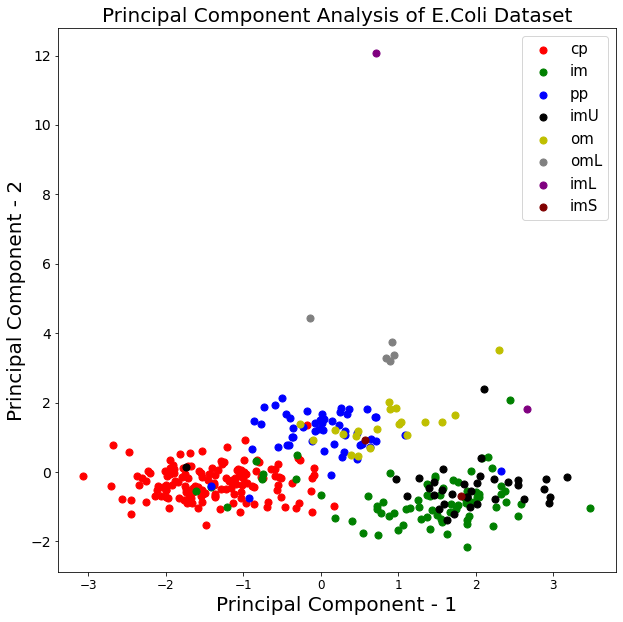

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of E.Coli Dataset",fontsize=20)
targets = ['cp', 'im', 'pp', 'imU', 'om', 'omL', 'imL', 'imS']
colors = ['r', 'g', 'b', 'black', 'y', 'grey', 'purple', 'maroon']
for target, color in zip(targets,colors):
    indicesToKeep = train['result'] == target
    plt.scatter(principal_coli_Df.loc[indicesToKeep, 'principal component 1'], principal_coli_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Create 3D model

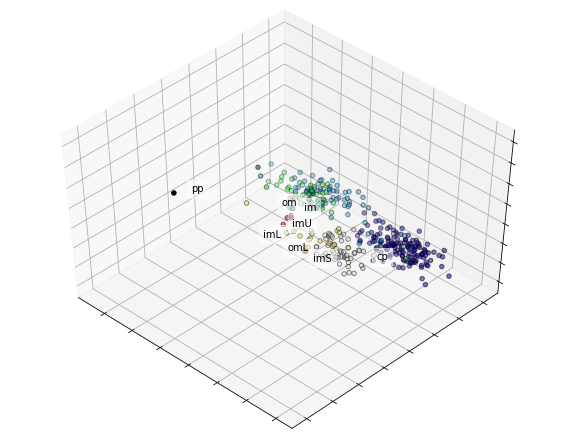

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y = train.result

y = le.fit_transform(y)

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('cp', 0), ('im', 1), ('pp', 2), ('imU', 3), ('om', 4), ('omL', 5), ('imL', 6), ('imS', 7)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(),name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0, 3, 4, 5, 6, 7]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()